In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [2]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [3]:
plotdir = 'powerlaw_3.5_plots/'

In [4]:
# Mc_files = ['powerlaw_3.5_lams/lam_0_1_linear_grid_0_to_576.csv']
Mc_files = ['powerlaw_3.5_lams/powerlaw_alpha_3.5_lam_0_1_Mc_0_1296.csv']



df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df = df1.loc[~(df1==0).all(axis=1)]


In [5]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]



print("Total number of events:",len(df))


df

Total number of events: 1296


,Mc,eta,DL,z,m1,m2,M_tot,q,snr,inspiral_t,...,inner_10,inner_11,inner_12,inner_13,inner_14,inner_15,inner_16,inner_17,inner_18,inner_19
0,17.050911,0.228697,34104.741036,3.763632,26.692877,14.630119,41.322996,1.824515,13.076655,79.648600,...,0.928975,0.919453,0.910551,0.902395,0.895032,0.888444,0.882546,0.877206,0.872261,0.867530
1,16.784046,0.231933,27335.054235,3.126338,25.588903,14.745827,40.334730,1.735332,9.868996,81.818906,...,0.930560,0.921288,0.912631,0.904706,0.897558,0.891162,0.885434,0.880242,0.875421,0.870795
2,20.300047,0.204987,26062.223477,3.004439,37.414559,15.121965,52.536523,2.474186,15.783481,59.147570,...,0.910668,0.898328,0.886710,0.876003,0.866309,0.857645,0.849946,0.843078,0.836857,0.831071
3,21.224505,0.233727,46501.921384,4.894599,31.861938,18.908681,50.770620,1.685043,12.084155,55.136060,...,0.908157,0.896006,0.884759,0.874598,0.865599,0.857741,0.850914,0.844934,0.839569,0.834564
4,7.323988,0.188044,13486.523547,1.745903,14.949309,5.012128,19.961437,2.982627,10.051910,325.965125,...,0.974710,0.970829,0.966985,0.963216,0.959544,0.955976,0.952504,0.949109,0.945764,0.942440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,9.785022,0.160009,32653.967702,3.628462,23.504851,5.876751,29.381603,3.999634,6.510200,200.548301,...,0.961962,0.956080,0.950261,0.944573,0.939063,0.933752,0.928641,0.923709,0.918923,0.914237
1292,17.955595,0.240461,21934.552878,2.603526,25.236671,16.988637,42.225308,1.485503,22.972455,73.133180,...,0.924839,0.915019,0.905933,0.897702,0.890368,0.883888,0.878155,0.873007,0.868252,0.863685
1293,20.008450,0.234567,24527.086516,2.856391,29.812325,17.946407,47.758731,1.661186,20.464452,60.910698,...,0.814975,0.804571,0.800136,0.801226,0.806771,0.815258,0.824954,0.834125,0.841207,0.844929
1294,23.733902,0.246706,12217.745825,1.610813,30.635379,24.326469,54.961848,1.259343,31.697173,45.754464,...,0.895038,0.881620,0.869393,0.858554,0.849170,0.841181,0.834420,0.828634,0.823516,0.818741


In [6]:
n_lams = 20
lam_colnames = ['lam_'+str(id) for id in range(n_lams)]
lams = df[lam_colnames].iloc[0].values

bias_colnames = ['bias_'+str(id) for id in range(n_lams)]
bias_lams = df[bias_colnames]
rel_bias_lams = df[bias_colnames].div(df["Mc"], axis='rows')

sig_bias_lams = df[bias_colnames].div(df["Mc_stat_err"], axis='rows')

inner_colnames = ['inner_'+str(id) for id in range(n_lams)]
inner_prod_lams = df[inner_colnames]

rel_bias_lams

,bias_0,bias_1,bias_2,bias_3,bias_4,bias_5,bias_6,bias_7,bias_8,bias_9,bias_10,bias_11,bias_12,bias_13,bias_14,bias_15,bias_16,bias_17,bias_18,bias_19
0,1.880338e-16,3.336217e-06,0.000012,0.000032,0.000064,0.000106,0.000155,0.000200,0.000230,0.000236,0.000207,0.000138,0.000027,0.000123,0.000303,0.000501,0.000703,0.000895,0.001063,0.001195
1,1.849629e-16,6.150453e-06,0.000018,0.000035,0.000059,0.000087,0.000116,0.000140,0.000154,0.000150,0.000122,0.000065,0.000023,0.000141,0.000285,0.000448,0.000621,0.000793,0.000952,0.001089
2,2.141594e-16,2.175235e-05,0.000070,0.000152,0.000271,0.000423,0.000594,0.000763,0.000907,0.000999,0.001016,0.000940,0.000764,0.000490,0.000130,0.000292,0.000749,0.001210,0.001642,0.002020
3,1.986416e-16,1.425004e-05,0.000049,0.000112,0.000207,0.000323,0.000447,0.000554,0.000621,0.000624,0.000548,0.000384,0.000138,0.000176,0.000533,0.000901,0.001247,0.001540,0.001755,0.001877
4,6.455579e-17,1.434353e-06,0.000004,0.000008,0.000014,0.000022,0.000031,0.000040,0.000047,0.000051,0.000050,0.000044,0.000032,0.000014,0.000009,0.000035,0.000063,0.000091,0.000116,0.000138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,9.730001e-18,3.381725e-06,0.000009,0.000018,0.000032,0.000048,0.000067,0.000084,0.000097,0.000102,0.000096,0.000078,0.000047,0.000004,0.000049,0.000109,0.000170,0.000229,0.000281,0.000323
1292,1.874086e-16,7.899676e-06,0.000028,0.000067,0.000126,0.000201,0.000281,0.000353,0.000399,0.000405,0.000360,0.000258,0.000101,0.000101,0.000332,0.000572,0.000799,0.000993,0.001139,0.001225
1293,1.787763e-16,3.297296e-04,0.000586,0.000724,0.000733,0.000642,0.000505,0.000387,0.000340,0.000388,0.000513,0.000665,0.000769,0.000754,0.000570,0.000211,0.000283,0.000828,0.001319,0.001656
1294,2.291979e-16,1.591028e-05,0.000061,0.000147,0.000276,0.000436,0.000603,0.000745,0.000827,0.000817,0.000694,0.000450,0.000094,0.000350,0.000843,0.001341,0.001796,0.002167,0.002422,0.002542


In [7]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = (df["Mc_stat_err"]>df["bias_9"])
        plt.scatter(x[unbiased_mask*mask], y[unbiased_mask*mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    if savefig is not None:
        plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

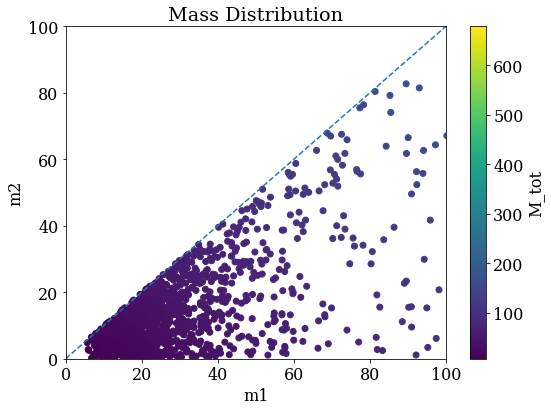

In [37]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False)
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


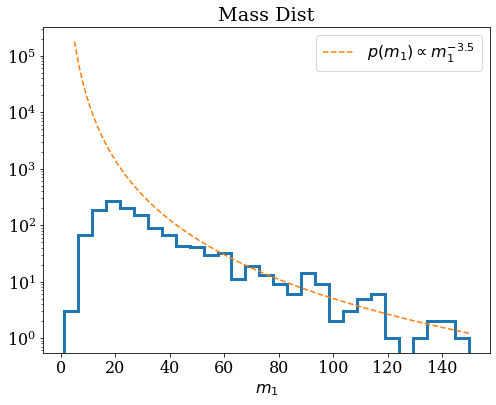

In [39]:
# Mass Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(1, 150, 30)

x = np.linspace(5, 150, 100)
plt.hist(df["m1"], bins, histtype='step', lw=3)
plt.plot(x, 50000000*x**(-3.5), linestyle='--', label='$p(m_1) \propto m_1^{-3.5}$')

plt.semilogy()

plt.xlabel("$m_1$")
plt.ylabel("")
plt.title("Mass Dist")
plt.legend()

plt.savefig(plotdir+"powerlaw_m1_dist.pdf")
plt.show()

In [40]:
def p_z_madau_fragos(z, z_min, z_max):
    '''
    Return normalized z-distribution from the Madau Fragos (2017)
    star formation rate density.
    '''
    term_1 = (1+z)**(2.6)
    term_2 = 1 + ((1+z)/3.2)**(6.2)

    psi = 0.01 * term_1/term_2
    norm = np.sum(psi)
    psi = psi/norm

    return psi

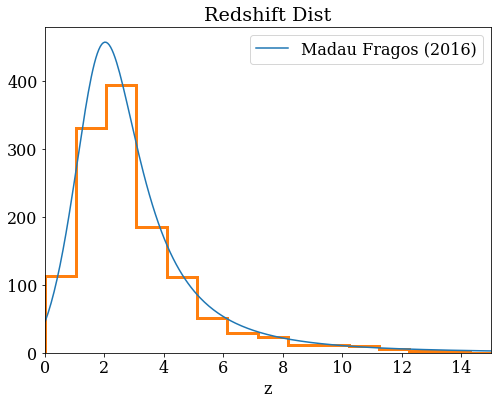

In [41]:
# Redshift Distribution
fig, ax = plt.subplots(figsize=(8, 6))
z_min = 0.02
z_max = 50
bins = np.linspace(z_min, z_max, 50)

z_range = np.linspace(z_min, z_max, 1000)
pdf_z = p_z_madau_fragos(z_range, z_min, z_max)
plt.plot(z_range, 30000*pdf_z, label="Madau Fragos (2016)")

plt.hist(df["z"], bins, histtype='step', lw=3)

plt.xlim(0, 15)

plt.legend()
plt.xlabel("z")
plt.ylabel("")
plt.title("Redshift Dist")
plt.show()

# Features

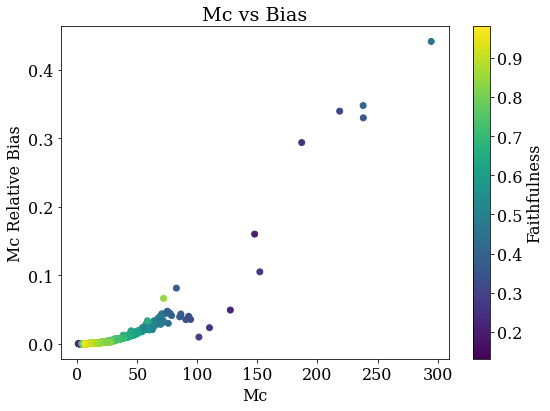

In [28]:
plot_bias_features(df["Mc"], np.abs(df["Mc_full_bias"]/df["Mc"]), df["full_inner_prod"], colormap="viridis",\
    title="Mc vs Bias", xlabel="Mc", ylabel="Mc Relative Bias", cbar_label="Faithfulness", savefig='mc_vs_bias')

Lower Mc events tend to have lower bias, higher faithfulness. Higher Mc events tend to have higher bias, lower faithfulness.

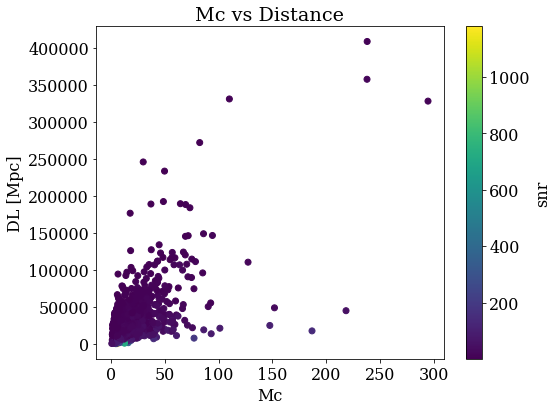

In [42]:
plot_bias_features(df["Mc"], df["DL"], df["snr"], colormap="viridis",\
    title="Mc vs Distance", xlabel="Mc", ylabel="DL [Mpc]", cbar_label="snr")

The events that made it through the gwbench pipeline have to be heavier if they are placed father away.

# Bias Stuff

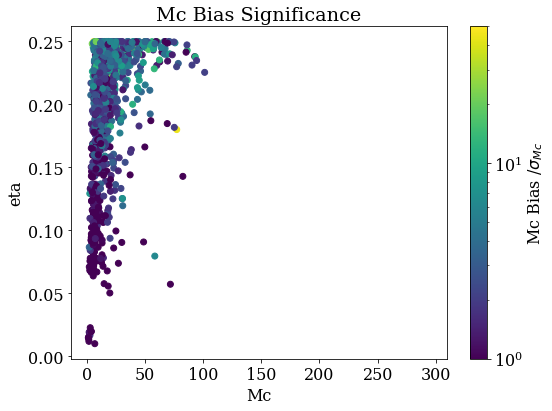

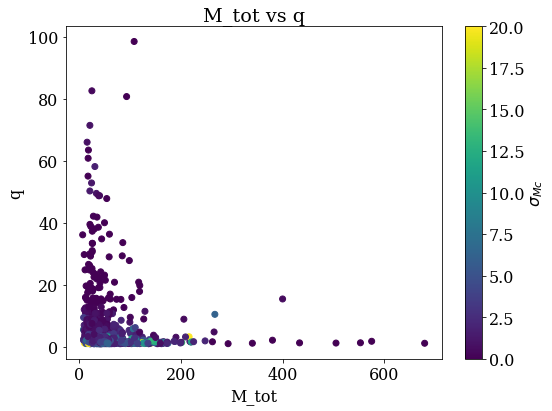

In [59]:
plot_bias_features(df["Mc"], df["eta"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="Mc Bias Significance", xlabel="Mc", ylabel="eta", cbar_label="Mc Bias /$\sigma_{Mc}$", norm=matplotlib.colors.LogNorm(1, 50), savefig='mc_bias_sig_distribution')

plot_bias_features(df["M_tot"], df["q"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="M_tot vs q", xlabel="M_tot", ylabel="q", cbar_label="$\sigma_{Mc}$", vmin=0, vmax=20)

All the events (so far) are biased more than 1 $\sigma$. The significance of the bias seems to be larger for migh Mc, unequal masses.

## Mc biases over lambda grid

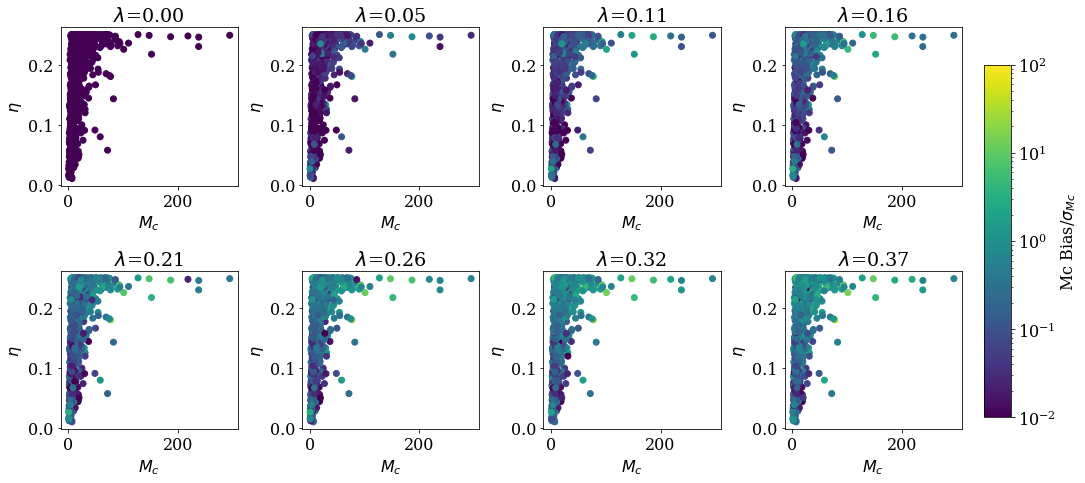

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
lams_range = lams[:8]

for i, lam in enumerate(lams_range):
    ax = axes.flat[i]
    x= df["Mc"]
    y= df["eta"]
    c = df[f"bias_{i}"]/df["Mc_stat_err"]
    colormap="viridis"
    sc = ax.scatter(x,y, c=c, cmap=colormap, norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=100))
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$M_c$")
    ax.set_title(f"$\lambda$={lams_range[i]:.2f}")

plt.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])
fig.colorbar(sc, cax=cbar_ax, label="Mc Bias/$\sigma_{Mc}$")

plt.savefig(plotdir+'mc_bias_sig_vs_lambda_grid.pdf')
plt.show()
    

## Avg Bias vs Lambda

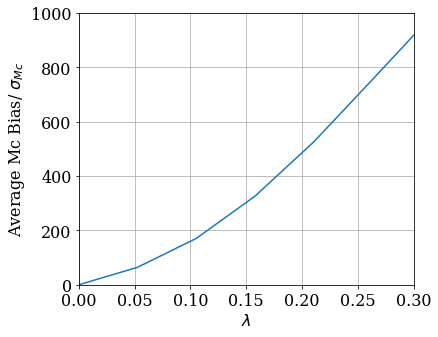

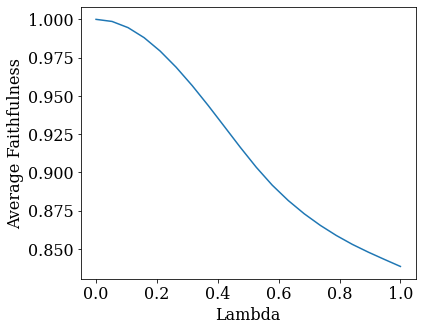

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))

avg_bias_sig = np.sum(sig_bias_lams, axis=0)
plt.plot(lams, avg_bias_sig)

plt.xlim(0, 0.3)
plt.ylim(0, 1000)
plt.xlabel("$\lambda$")
plt.ylabel("Average Mc Bias/ $\sigma_{Mc}$")
plt.grid()
plt.savefig(plotdir+"avg_mc_bias_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))

average_inner_prods =np.average(inner_prod_lams, axis=0)
plt.plot(lams, average_inner_prods)

plt.xlabel("Lambda")
plt.ylabel("Average Faithfulness")
plt.show()

## fraction of unbiased events vs lambda

In [11]:
unbiased_frac = np.zeros(n_lams)
for i in range(n_lams):
    bias = bias_lams.iloc[:,i].values
    stat_err = df["Mc_stat_err"].values
    unbiased_mask = (bias < stat_err)
    unbiased_frac[i] = np.sum(unbiased_mask)/len(df["Mc"])


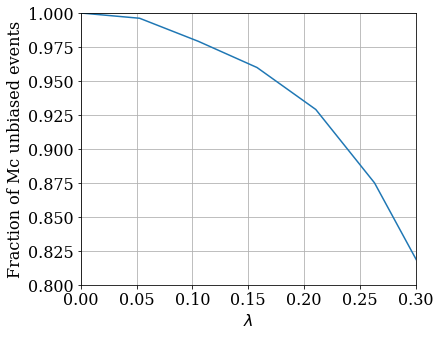

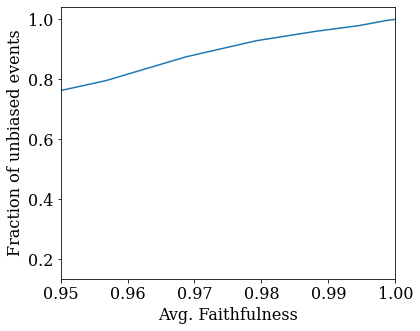

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(lams, unbiased_frac)
plt.xlabel("$\lambda$")
plt.ylabel("Fraction of Mc unbiased events")
plt.xlim(0, 0.3)
plt.ylim(0.8, 1.0)
plt.grid()
plt.savefig(plotdir+"mc_frac_unbiased_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(average_inner_prods, unbiased_frac)
plt.xlabel("Avg. Faithfulness")
plt.ylabel("Fraction of unbiased events")
plt.xlim(0.95, 1)
plt.show()